## 실험1 회귀분석 모델 비교

- 1)상권코드 2)시군구로 각각 분류시 가장 성능이 좋은 모델을 찾기위해 비교
- Cross Validation 10회 실시 후 비교
- Goal : RMSE를 최소화시키는 Regression 모델 찾기 


### 1.1 회귀분석(상권코드)

In [18]:
import pandas as pd
import numpy as np

# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_grouped_rate.csv') 
df = pd.read_csv('../raw_data/df_grouped_rate.csv') 
y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object') 
X_dum = pd.get_dummies(X)

In [17]:
#OLS summary를 보기위해 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.
# 로버스트 스케일링
rb = RobustScaler()
Xs_train = rb.fit_transform(X_train)
Xs_test = rb.transform(X_test)

model = sm.OLS(y_train, Xs_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     66.62
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:59:44   Log-Likelihood:            -2.0276e+06
No. Observations:               90612   AIC:                         4.057e+06
Df Residuals:                   89544   BIC:                         4.067e+06
Df Model:                        1067                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.392e+08   5.07e+06    106.360      0.0

In [ ]:
from sklearn.metrics import r2_score
R2_lr = []
MAE_lr = []
MSE_lr = []
RMSE_lr = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_lr.append(r2_score(y_test , y_pred))
    MAE_lr.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_lr.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_lr.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


In [ ]:
print('R2_lr = ', R2_lr.mean())
print('MAE_lr = ', MAE_lr.mean())
print('MSE_lr = ', MSE_lr.mean())
print('RMSE_lr = ', RMSE_lr.mean())

### 1.2 행정구역 + 회귀분석

In [14]:
df = pd.read_csv("../raw_data/df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("../raw_data/cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year',], axis=1, inplace =True)

y=df_merged.iloc[:,1:2]
X= df_merged.drop(['sales_total'],axis=1)
X= X.iloc[:,1:]
# 더미변수화
X['cgoongoo'] = X['cgoongoo'].astype('object')
X_dum = pd.get_dummies(X)

In [15]:
#OLS summary를 보기위해 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=0) # y 값이 정의되지 않아 df.sales_total 으로 대체하겠습니다.
# 로버스트 스케일링
rb = RobustScaler()
Xs_train = rb.fit_transform(X_train.iloc[:,:17])
Xs_train = np.hstack((Xs_train, X_train.iloc[:,17:]))

Xs_test = rb.transform(X_test.iloc[:,:17])
Xs_test = np.hstack((Xs_test, X_test.iloc[:,17:]))
model = sm.OLS(y_train, Xs_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     937.4
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:54:37   Log-Likelihood:            -2.0381e+06
No. Observations:               90612   AIC:                         4.076e+06
Df Residuals:                   90570   BIC:                         4.077e+06
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.928e+08   4.77e+06    103.377      0.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

R2_cgoongu = []
MAE_cgoongu = []
MSE_cgoongu = []
RMSE_cgoongu = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")


    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_cgoongu.append(r2_score(y_test , y_pred))
    MAE_cgoongu.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_cgoongu.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_cgoongu.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


In [ ]:
print('R2_cgoongu = ',R2_cgoongu.mean()) b
print('MAE_cgoongu = ',MAE_cgoongu.mean()) 
print('MSE_cgoongu = ',MSE_cgoongu.mean()) 
print('RMSE_cgoongu = ',RMSE_cgoongu.mean()) 

### 1.3 상권코드 + Random Forest

In [ ]:
import pandas as pd 
df = pd.read_csv('../raw_data/df_grouped_rate.csv') #폴더 위치는 상이할 수 있음

# 더미변수화
y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object') 
# X_dum = pd.get_dummies(X)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
R2_RF = []
MAE_RF = []
MSE_RF = []
RMSE_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")


    # 오차 결과값
    R2_RF.append(r2_score(y_test , y_pred))
    MAE_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


In [ ]:
print('R2_RF = ', R2_RF.mean()) 
print('MAE_RF = ', MAE_RF.mean()) 
print('MSE_RF = ', MSE_RF.mean()) 
print('RMSE_RF = ', RMSE_RF.mean()) 

### 1.4 행정구역 + Random Forest

In [ ]:
import pandas as pd

df = pd.read_csv("../raw_data/df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("../raw_data/cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year'], axis=1, inplace =True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
y=df_merged.iloc[:,1:2]
X= df_merged.drop(['sales_total','code'],axis=1)
X['cgoongoo'] = X['cgoongoo'].astype('object') 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np 

R2_RF_c = []
MAE_RF_c = []
MSE_RF_c = []
RMSE_RF_c = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")


    # 오차 결과값
    R2_RF_c.append(r2_score(y_test , y_pred))
    MAE_RF_c.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF_c.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF_c.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)


### 1.5 상권코드 + LightGBM

In [ ]:
import pandas as pd 
df = pd.read_csv('df_grouped_rate.csv') #폴더 위치는 상이할 수 있음
y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object')

# # 더미변수화
X = pd.get_dummies(X)  


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
R2_lgb_gbdt = []
MAE_lgb_gbdt = []
MSE_lgb_gbdt = []
RMSE_lgb_gbdt = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

    train_ds = lgb.Dataset(train_x, label = train_y) 
    test_ds = lgb.Dataset(test_x, label = test_y) 
   
  #파라미터 설정
    params = {'learning_rate': 0.8, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'mse', 
              'is_training_metric': True, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'device': 'cpu'
             }
    # 훈련
    model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=800)
#     predict_train = model.predict(train_x)
    y_pred = model.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_lgb_gbdt.append(r2_score(test_y , y_pred))
    MAE_lgb_gbdt.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_lgb_gbdt.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_lgb_gbdt.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


In [ ]:
print('R2_lgb_gbdt = ', R2_lgb_gbdt.mean()) 
print('MAE_lgb_gbdt = ', MAE_lgb_gbdt.mean()) 
print('MSE_lgb_gbdt = ', MSE_lgb_gbdt.mean()) 
print('RMSE_lgb_gbdt = ', RMSE_lgb_gbdt.mean()) 

### 1.6  행정구역 + LightGBM

In [ ]:
import pandas as pd 
df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year'], axis=1, inplace =True)

y=df_merged.iloc[:,1:2]
X= df_merged.drop(['sales_total','code'],axis=1)

X= X.iloc[:,1:]


X['cgoongoo'] = X['cgoongoo'].astype('object')
# # 더미변수화
X = pd.get_dummies(X)  

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
R2_lgb_gbdt_c = []
MAE_lgb_gbdt_c = []
MSE_lgb_gbdt_c = []
RMSE_lgb_gbdt_c = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)


#     model = lgb.LGBMClassifier(n_estimators=100, max_depth=1, random_state=0)
   # 데이터셋으로 변환
    train_ds = lgb.Dataset(train_x, label = train_y) 
    test_ds = lgb.Dataset(test_x, label = test_y) 
   
  #파라미터 설정
    params = {'learning_rate': 0.01, 
              'max_depth': 16, 
              'boosting': 'gbdt', 
              'objective': 'regression', 
              'metric': 'mse', 
              'is_training_metric': True, 
              'feature_fraction': 0.9, 
              'bagging_fraction': 0.7, 
              'bagging_freq': 5, 
              'device': 'cpu'
             }
    # 훈련
    model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=500)
#     predict_train = model.predict(train_x)
    y_pred = model.predict(test_x)
    print(i+1,"번째 시도")

    # 오차 결과값
    R2_lgb_gbdt_c.append(r2_score(test_y , y_pred))
    MAE_lgb_gbdt_c.append(metrics.mean_absolute_error(test_y, y_pred))
    MSE_lgb_gbdt_c.append(metrics.mean_squared_error(test_y, y_pred))
    RMSE_lgb_gbdt_c.append(np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print('='*50)
    print('='*50)


In [ ]:
print('R2_lgb_gbdt_c = ',R2_lgb_gbdt_c.mean())
print('MAE_lgb_gbdt_c = ',MAE_lgb_gbdt_c.mean())
print('MSE_lgb_gbdt_c = ',MSE_lgb_gbdt_c.mean())
print('RMSE_lgb_gbdt_c = ',RMSE_lgb_gbdt_c.mean())

In [72]:
import pickle
with open('pkl_files\\R2_cgoongu.pkl', 'rb') as f: 
    R2_cgoongu = pickle.load(f)
with open('pkl_files\\R2_cgoongu.pkl', 'rb') as f: 
    R2_cgoongu = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt.pkl', 'rb') as f: 
    R2_lgb_gbdt = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt_2.pkl', 'rb') as f: 
    R2_lgb_gbdt_2 = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt_c.pkl', 'rb') as f: 
    R2_lgb_gbdt_c = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt_c2.pkl', 'rb') as f: 
    R2_lgb_gbdt_c2 = pickle.load(f)
with open('pkl_files\\R2_lr.pkl', 'rb') as f: 
    R2_lr = pickle.load(f)
with open('pkl_files\\R2_RF.pkl', 'rb') as f: 
    R2_RF = pickle.load(f)
with open('pkl_files\\R2_RF_c.pkl', 'rb') as f: 
    R2_RF_c = pickle.load(f)
with open('pkl_files\\R2_lgb_gbdt3.pkl', 'rb') as f: 
    R2_lgb_gbdt3 = pickle.load(f)
    
    
with open('pkl_files\\MAE_cgoongu.pkl', 'rb') as f: 
    MAE_cgoongu = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt.pkl', 'rb') as f: 
    MAE_lgb_gbdt = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt_2.pkl', 'rb') as f: 
    MAE_lgb_gbdt_2 = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt_c.pkl', 'rb') as f: 
    MAE_lgb_gbdt_c = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt_c2.pkl', 'rb') as f: 
    MAE_lgb_gbdt_c2 = pickle.load(f)
with open('pkl_files\\MAE_lr.pkl', 'rb') as f: 
    MAE_lr = pickle.load(f)
with open('pkl_files\\MAE_RF.pkl', 'rb') as f: 
    MAE_RF = pickle.load(f)
with open('pkl_files\\MAE_RF_c.pkl', 'rb') as f: 
    MAE_RF_c = pickle.load(f)
with open('pkl_files\\MAE_lgb_gbdt3.pkl', 'rb') as f: 
    MAE_lgb_gbdt3 = pickle.load(f)
    
    
    
with open('pkl_files\\MSE_cgoongu.pkl', 'rb') as f: 
    MSE_cgoongu = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt.pkl', 'rb') as f: 
    MSE_lgb_gbdt = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt_2.pkl', 'rb') as f: 
    MSE_lgb_gbdt_2 = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt_c.pkl', 'rb') as f: 
    MSE_lgb_gbdt_c = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt_c2.pkl', 'rb') as f: 
    MSE_lgb_gbdt_c2 = pickle.load(f)
with open('pkl_files\\MSE_lr.pkl', 'rb') as f: 
    MSE_lr = pickle.load(f)
with open('pkl_files\\MSE_RF.pkl', 'rb') as f: 
    MSE_RF = pickle.load(f)
with open('pkl_files\\MSE_RF_c.pkl', 'rb') as f: 
    MSE_RF_c = pickle.load(f)
with open('pkl_files\\MSE_lgb_gbdt3.pkl', 'rb') as f: 
    MSE_lgb_gbdt3 = pickle.load(f)    
    
    

with open('pkl_files\\RMSE_cgoongu.pkl', 'rb') as f: 
    RMSE_cgoongu = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt.pkl', 'rb') as f: 
    RMSE_lgb_gbdt = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt_2.pkl', 'rb') as f: 
    RMSE_lgb_gbdt_2 = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt_c.pkl', 'rb') as f: 
    RMSE_lgb_gbdt_c = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt_c2.pkl', 'rb') as f: 
    RMSE_lgb_gbdt_c2 = pickle.load(f)
with open('pkl_files\\RMSE_lr.pkl', 'rb') as f: 
    RMSE_lr = pickle.load(f)
with open('pkl_files\\RMSE_RF.pkl', 'rb') as f: 
    RMSE_RF = pickle.load(f)
with open('pkl_files\\RMSE_RF_c.pkl', 'rb') as f: 
    RMSE_RF_c = pickle.load(f)
with open('pkl_files\\RMSE_lgb_gbdt3.pkl', 'rb') as f: 
    RMSE_lgb_gbdt3 = pickle.load(f)

with open('pkl_files\\R2_lr_s.pkl', 'rb') as f: 
    R2_lr_s = pickle.load(f)
with open('pkl_files\\MAE_lr_s.pkl', 'rb') as f: 
    MAE_lr_s = pickle.load(f)
with open('pkl_files\\MSE_lr_s.pkl', 'rb') as f: 
    MSE_lr_s = pickle.load(f)
with open('pkl_files\\RMSE_lr_s.pkl', 'rb') as f: 
    RMSE_lr_s = pickle.load(f)    
    
import pickle    
with open('pkl_files\\R2_HC2.pkl', 'rb') as f: 
    R2_HC2 = pickle.load(f)
with open('pkl_files\\MAE_HC2.pkl', 'rb') as f: 
    MAE_HC2 = pickle.load(f)
with open('pkl_files\\MSE_HC2.pkl', 'rb') as f: 
    MSE_HC2 = pickle.load(f)
with open('pkl_files\\RMSE_HC2.pkl', 'rb') as f: 
    RMSE_HC2 = pickle.load(f)
    
R2_k =  [0.3010486841388068, 0.2573063586482355, 0.26738912276864624, 0.2977569096536117, 0.2926221466864226, 0.26730441368083646, 0.291606128120118, 0.2998210344687421, 0.3016117642648646, 0.31131440507747987]
MAE_k =  [699625494.5392678, 707935314.0150232, 712652201.9400593, 701338241.9598005, 714425111.4063109, 711162482.080123, 708605847.6798493, 709222229.124304, 706597004.9721053, 709682717.3362817]
MSE_k =  [1.9462141858846446e+18, 1.9238838633603566e+18, 2.0519092883403553e+18, 1.8607943366000018e+18, 1.9987669135101965e+18, 2.1134141208493327e+18, 1.998376265991056e+18, 2.03291415357376e+18, 1.899194803848009e+18, 2.058265767786249e+18]
RMSE_k =  [1395067806.9128556, 1387041406.505356, 1432448703.5633616, 1364109356.5400107, 1413777533.2456646, 1453758618.4952896, 1413639369.143013, 1425802985.5396433, 1378112768.9155228, 1434665733.816156]


with open('pkl_files/MAEs_lr_t.pkl', 'rb') as f:
    MAEs_lr_t = pickle.load(f)
with open('pkl_files/MAEs_RF_t.pkl', 'rb') as f:
    MAEs_RF_t = pickle.load(f)
with open('pkl_files/MSEs_lr_t.pkl', 'rb') as f:
    MSEs_lr_t = pickle.load(f)
with open('pkl_files/MSEs_RF_t.pkl', 'rb') as f:
    MSEs_RF_t = pickle.load(f)
with open('pkl_files/MSE_lr_t.pkl', 'rb') as f:
    MSE_lr_t = pickle.load(f)
with open('pkl_files/MSE_RF_t.pkl', 'rb') as f:
    MSE_RF_t = pickle.load(f)
with open('pkl_files/R2s_lr_t.pkl', 'rb') as f:
    R2s_lr_t = pickle.load(f)
with open('pkl_files/R2s_RF_t.pkl', 'rb') as f:
    R2s_RF_t = pickle.load(f)
with open('pkl_files/R2_lr_t.pkl', 'rb') as f:
    R2_lr_t = pickle.load(f)
with open('pkl_files/R2_RF_t.pkl', 'rb') as f:
    R2_RF_t = pickle.load(f)
with open('pkl_files/RMSEs_lr_t.pkl', 'rb') as f:
    RMSEs_lr_t = pickle.load(f)
with open('pkl_files/RMSEs_RF_t.pkl', 'rb') as f:
    RMSEs_RF_t = pickle.load(f)
with open('pkl_files/RMSE_lr_t.pkl', 'rb') as f:
    RMSE_lr_t = pickle.load(f)
with open('pkl_files/RMSE_RF_t.pkl', 'rb') as f:
    RMSE_RF_t = pickle.load(f)

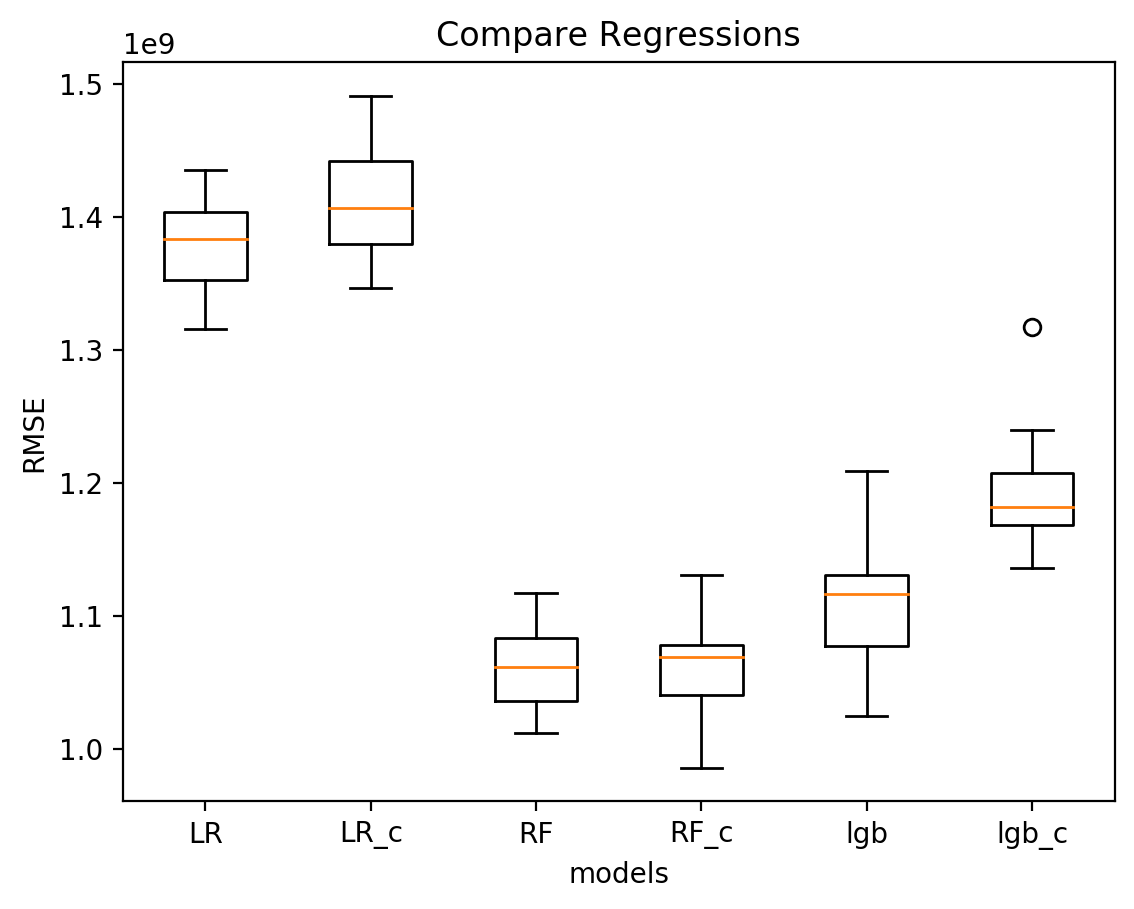

In [57]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [
    RMSE_lr,
     RMSE_cgoongu,

     RMSE_RF,
     RMSE_RF_c,

     RMSE_lgb_gbdt,

     RMSE_lgb_gbdt_c,

     ]
    ,labels=[
     'LR',
     'LR_c',

     'RF',
     'RF_c',
 
     'lgb',  #2를 살렸지만 그래프에선 편의를 위해 2 생략

     'lgb_c',

 ]
    
    )


axes1.set_xlabel('models') 
axes1.set_ylabel('RMSE') 
axes1.set_title('Compare Regressions')
plt.style.use('default')
boxplot.savefig('compare_regressions.png', transparent=True) #png파일로 저장

plt.show()

----------------------------------------------------------------

## 실험2 클러스터링 분석

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [60]:
# 새 위치에서 실행 시 데이터 위치 주의
df = pd.read_csv('../raw_data/df_grouped_rate.csv') 

### 2.1 K-means 클러스터링 특징 찾기

### 불러온 dataframe에서 상권코드, 업종코드 및 연도 제거하기 / 독립 종속 변수 분리하기

In [61]:
y = df[['sales_total']]
X = df.drop(['sales_total', 'district', 'year', 'code'], axis=1)

### 실루엣 점수와 inertia 실행 소요 시간 확인

In [64]:
%%time
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)

KeyboardInterrupt: 

In [ ]:
%%time
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
kmeans.inertia_

### Inertia 그려서 '최적 군집 수' 대강의 위치 찾기

In [ ]:
x = []
y = []
for i in range(1, 31):
    x.append(i)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    y.append(kmeans.inertia_)
    
plt.plot(x, y, 'ro-')
plt.style.use('default')
plt.show()

### 군집 수 3으로 결정하고, Kmeans 실행

In [65]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
train_labels = kmeans.labels_

In [ ]:
lb_df= pd.DataFrame(train_labels, columns=['labels'], dtype=str)
X_cl = pd.concat([lb_df, X], axis=1)
X_cl.tail()

In [ ]:
# 군집별 데이터 갯수 확인
X_cl.groupby(by='labels').size()

### 군집별 기술통계와 바이올린 플롯으로 데이터 확인

#### 배후지 아파트 평균가격

In [ ]:
# # 17개 변수 중 배후지 아파트 평균 가격 - 군집별 기술통계

X_cl[['labels', X_cl.columns[8]]].groupby(by='labels').describe()

In [ ]:
# 17개 변수 중 배후지 아파트 평균 가격 - 군집별 분포
sns.violinplot(x='labels', y=X_cl.columns[8], data=X_cl)
plt.style.use('default')
plt.show()

#### 배후지 월 평균 소득

In [ ]:
# 17개 변수 중 배후지 월 평균 소득 - 군집별 기술통계
X_cl[['labels', X_cl.columns[9]]].groupby(by='labels').describe()

In [ ]:
# 17개 변수 중 배후지 월 평균 소득 - 군집별 분포
sns.boxplot(x='labels', y=X_cl.columns[9], data=X_cl)
plt.show()

### 2.2 T-sne로 Clustering 결과 시각화

In [66]:
X=df[df.columns[4:]]
y=df["district"]
y=np.array(y)
X=np.array(X)

In [67]:
## KMEANS
from sklearn.cluster import KMeans
model = KMeans( n_clusters=25, random_state=0)
model.fit(X)
y_pred = model.labels_
y=model.fit(X)
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)

In [68]:
## TSNE
df3= pd.read_csv('df4.csv',encoding='utf-8' )


In [ ]:
df3.loc[:,'district'] = df3.district.astype(float)
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)
X2 = pd.concat([y_pred_df, df3], axis=1)
X2.loc[:,'district'] = X2.district.astype(np.float)
X2.loc[:,'labels'] = X2.labels.astype(np.float)

### tsne데이터에 좌표값(상권코드,행정구, 시군구) 추가

In [ ]:
maps = pd.read_csv('maps.csv',encoding='utf-8')
X2.columns=["labels","district","x_tsne","y_tsne"]
maps2=maps[["상권_코드","엑스좌표_값","와이좌표_값","시군구_코드","행정동_코드"]]
maps2.columns=["district","xmap","ymap","C","H"]
np.unique(maps2['district'])

X2.loc[:,'district'] = X2.district.astype('int64')
maps2.loc[:,'district'] = maps2.district.astype('int64')
df_final = pd.merge(X2, maps2, on=['district'])
df_final.loc[:,'district'] = df_final.district.astype('int64')


### Visualization

In [ ]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='district',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=1007),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_district", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()

### 행정동

In [ ]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='H',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=349),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_H", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


### 시군구

In [ ]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='C',
                
                legend= False,
                
                palette=sns.color_palette("Paired", n_colors=25),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_C", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


### k-means

In [ ]:
plt.figure(figsize=(16,15))
sns.set_style("white")
sns.scatterplot(x='xmap', 

                y='ymap', 

                hue='labels',
                
                
                palette=sns.color_palette("hls", n_colors=25),

                
                
                
                
                data=df_final)
plt.savefig(fname="map_K", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


-------------------------------------------------------------------------

## 실험3 클러스터링으로 차원축소 후 회귀분석

### 3.1 K-means + Linear Regression

In [ ]:

import pandas as pd 
df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
## 불러온 dataframe에서 상권코드, 연도 제거하기 / 독립 종속 변수 분리하기
y = df[['sales_total']]
X = df.drop(['sales_total', 'district', 'year', 'code'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

R2_k = []
MAE_k = []
MSE_k = []
RMSE_k = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
    kmeans = KMeans(n_clusters=25)
    kmeans.fit(X_train)
    train_labels = kmeans.labels_
    train_lb_df= pd.DataFrame(train_labels, columns=['labels'], dtype=str)
    test_labels = kmeans.predict(X_test)
    test_lb_df= pd.DataFrame(test_labels, columns=['labels'],  dtype=str)
    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = pd.DataFrame(rb.fit_transform(X_train)) #연속형 데이터만 스케일링
    Xs_test = pd.DataFrame(rb.transform(X_test))

    X_train = pd.get_dummies(pd.concat([train_lb_df,Xs_train], axis=1))
    X_test = pd.get_dummies(pd.concat([test_lb_df,Xs_test], axis=1))

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_k.append(r2_score(y_test , y_pred))
    MAE_k.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_k.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_k.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

In [ ]:
print('R2_k = ',R2_k.mean() )
print('MAE_k = ',MAE_k.mean())
print('MSE_k = ',MSE_k.mean() )
print('RMSE_k = ',RMSE_k.mean() )

### 3.2 Hierachical Clustering + Linear Regression

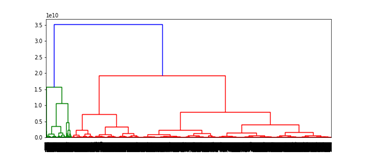

- 댄드로그램을 보고 클러스터 갯수 결정(8개)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt

import pandas as pd 
df = pd.read_csv("df_grouped_rate.csv", encoding ='utf-8')
df.columns



df.drop(['year', 'district', 'code'], axis=1, inplace =True)

np.random.seed(seed=100)
idx= np.random.uniform(0, df.shape[0], size=50000 )

y=df.iloc[idx,0:1]
X= df.drop(['sales_total'],axis=1)
X=X.iloc[idx]

## 클러스터링
aggcl = AgglomerativeClustering(n_clusters=8)
aggcl.fit(X)

# 클러스터링 데이터로 라벨링하여 기존 상권코드 데이터와 교체
y_pred = aggcl.labels_
y_pred_df= pd.DataFrame(y_pred, columns=['labels'], dtype=str)

X = pd.concat([y_pred_df, X.reset_index(drop=True)],axis=1) # Sales_total 속성은 맞추고자 하는 속성이므로 X에 포함되어서는 안됩니다.

# 더미변수화
X['labels']=X['labels'].astype('object')
X_dum = pd.get_dummies(X)

y=df.iloc[idx,0:1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

R2_HC = []
MAE_HC = []
MSE_HC = []
RMSE_HC = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")
    # 정확도 결과값

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_HC.append(r2_score(y_test , y_pred))
    MAE_HC.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_HC.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_HC.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

In [ ]:
print('R2_HC = ',R2_HC.mean())
print('MAE_HC = ',MAE_HC.mean())
print('MSE_HC = ',MSE_HC.mean())
print('RMSE_HC = ',RMSE_HC.mean())

### 3.3 T-SNE + Linear Regression

In [ ]:
## 데이터 불러오기
df = pd.read_csv('df_all.csv')
y = df[['sales_total']]
X = df[df.columns[1:]]
X.drop(["year","code","sales_total","district","xmap","ymap","C","H"],axis=1,inplace=True)


In [ ]:
from sklearn.metrics import r2_score
R2_lr = []
MAE_lr = []
MSE_lr = []
RMSE_lr = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

    # 로버스트 스케일링
    rb = RobustScaler()
    Xs_train = rb.fit_transform(X_train)
    Xs_test = rb.transform(X_test)

    # 회귀분석
    regressor = LinearRegression()
    model = regressor.fit(Xs_train, y_train)

    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    y_pred = model.predict(Xs_test)
    R2_lr.append(r2_score(y_test , y_pred))
    MAE_lr.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_lr.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_lr.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

In [ ]:
print(R2_lr.mean())
print(MAE_lr.mean())
print(MSE_lr.mean())
print(RMSE_lr.mean())

### 3.4 Compare

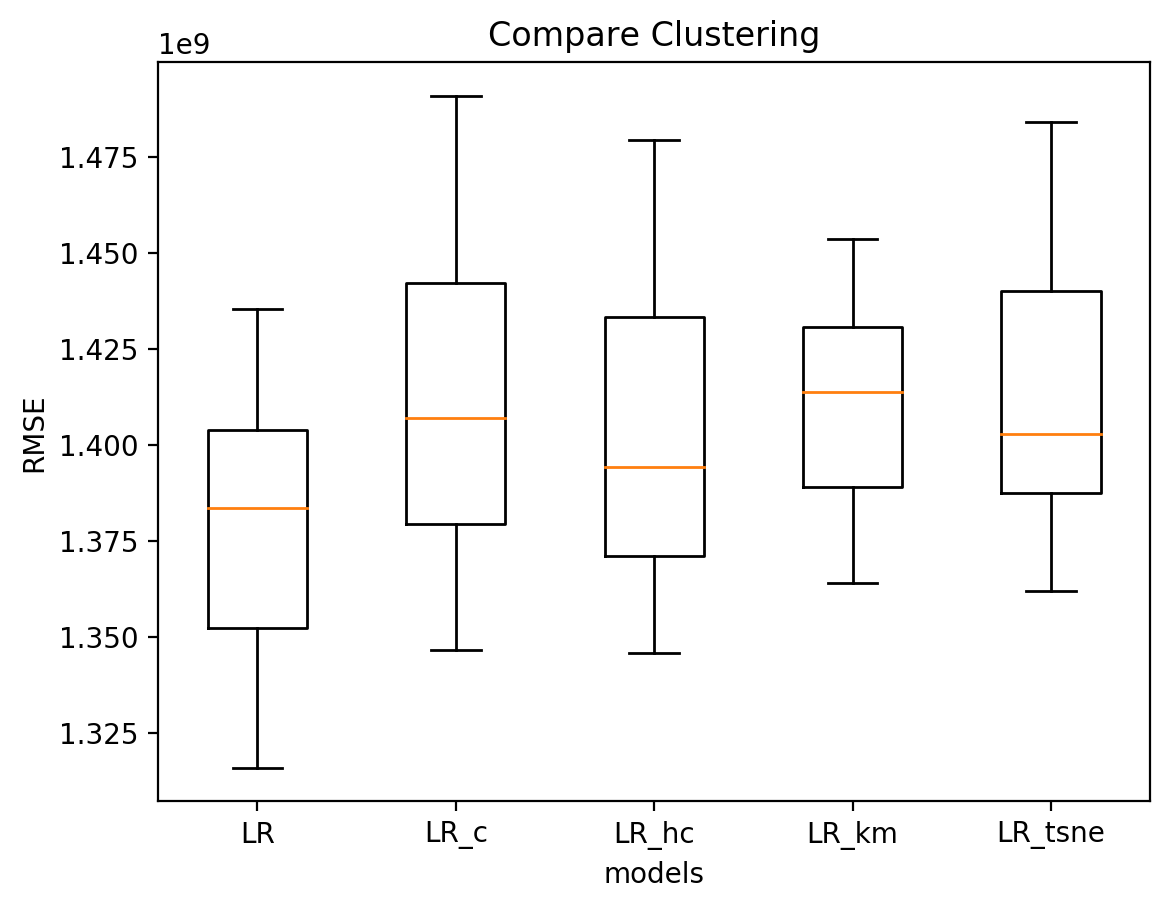

In [70]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [
     RMSE_lr,
     RMSE_cgoongu,
     RMSE_HC2,
     RMSE_k,
        RMSE_lr_t

     ]
    ,labels=[
     'LR',
     'LR_c',
     'LR_hc',
     'LR_km',
        'LR_tsne'

 ]
    
    )


axes1.set_xlabel('models') 
axes1.set_ylabel('RMSE') 
axes1.set_title('Compare Clustering')
plt.style.use('default')
boxplot.savefig('compare_clustering.png', transparent=True) #png파일로 저장
plt.show()

- Random Forest Regressor 모델을 사용했을 때 최고의 벡터축소 방법 찾기

## 4. Random Forest 비교

### 3.1 상권코드 + Random Forest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

from sklearn.ensemble import RandomForestRegressor
## kmeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np

In [ ]:
import pandas as pd 
df = pd.read_csv('/content/df_grouped_rate.csv') #폴더 위치는 상이할 수 있음


y=df.iloc[:,3:4]
X= df.iloc[:,1:].drop(['sales_total','code'],axis=1)
X['district'] = X['district'].astype('object') 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np
R2_RF = []
MAE_RF = []
MSE_RF = []
RMSE_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    R2_RF.append(r2_score(y_test , y_pred))
    MAE_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

In [ ]:
print(R2_RF.mean()) 
print(MAE_RF.mean()) 
print(MSE_RF.mean()) 
print(RMSE_RF.mean()) 

### 3.2 행정구역 + Random Forest

In [ ]:
import pandas as pd

df = pd.read_csv("../raw_data/df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("../raw_data/cgoongoo1.csv", encoding ='utf-8')
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district','year'], axis=1, inplace =True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
y=df_merged.iloc[:,1:2]
X= df_merged.drop(['sales_total','code'],axis=1)
X['cgoongoo'] = X['cgoongoo'].astype('object') 


### 3.3 K-means Clustering + Random Forest

### 3.4 T-sne + Random Forest

In [ ]:
## 데이터 불러오기
df = pd.read_csv('df_all.csv')
y = df[['sales_total']]
X = df[df.columns[1:]]
X.drop(["year","code","sales_total","district","xmap","ymap","C","H"],axis=1,inplace=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
R2_RF = []
MAE_RF = []
MSE_RF = []
RMSE_RF = []
for i in range(10):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    Xs_train = X_train
    Xs_test = X_test
    regr = RandomForestRegressor(n_estimators=50,max_depth=20, n_jobs=-1)
    model=regr.fit(Xs_train, y_train)
    y_pred=model.predict(Xs_test)
    
    print(i+1,"번째 시도")
    # 정확도 결과값
    print(model.score(Xs_train, y_train))
    print(model.score(Xs_test, y_test))

    # 오차 결과값
    R2_RF.append(r2_score(y_test , y_pred))
    MAE_RF.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE_RF.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE_RF.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('='*50)
    print('='*50)

In [ ]:
print(R2_RF) 
print(MAE_RF) 
print(MSE_RF) 
print(RMSE_RF) 

### compare RF

In [74]:
R2_RF_k =  [0.6276830942247569, 0.6227219050086259, 0.6074613617205926, 0.607759180370252, 0.6283858605284891, 0.6113629135760819, 0.6216540318341592, 0.593348112915322, 0.6122092835511359, 0.6070386864527917]
MAE_RF_k =  [492331332.51738673, 501241043.5317287, 502445215.580484, 506041214.32808477, 499276514.1318197, 501298782.9700455, 505018874.5552838, 505391611.1989365, 510191128.26462394, 507372316.58571273]
MSE_RF_k =  [1.0010803463214586e+18, 1.0700702132234872e+18, 1.0390394722161436e+18, 1.0510629257786004e+18, 1.0868321966788817e+18, 1.0790707122750404e+18, 1.1099574979953463e+18, 1.2405380961268682e+18, 1.2116018350827996e+18, 1.1339471213799153e+18]
RMSE_RF_k =  [1000540027.345962, 1034441981.5646923, 1019332856.4390258, 1025213600.0749309, 1042512444.3760284, 1038783284.5570054, 1053545204.5334108, 1113794458.6533318, 1100727866.0426471, 1064869532.5625179]

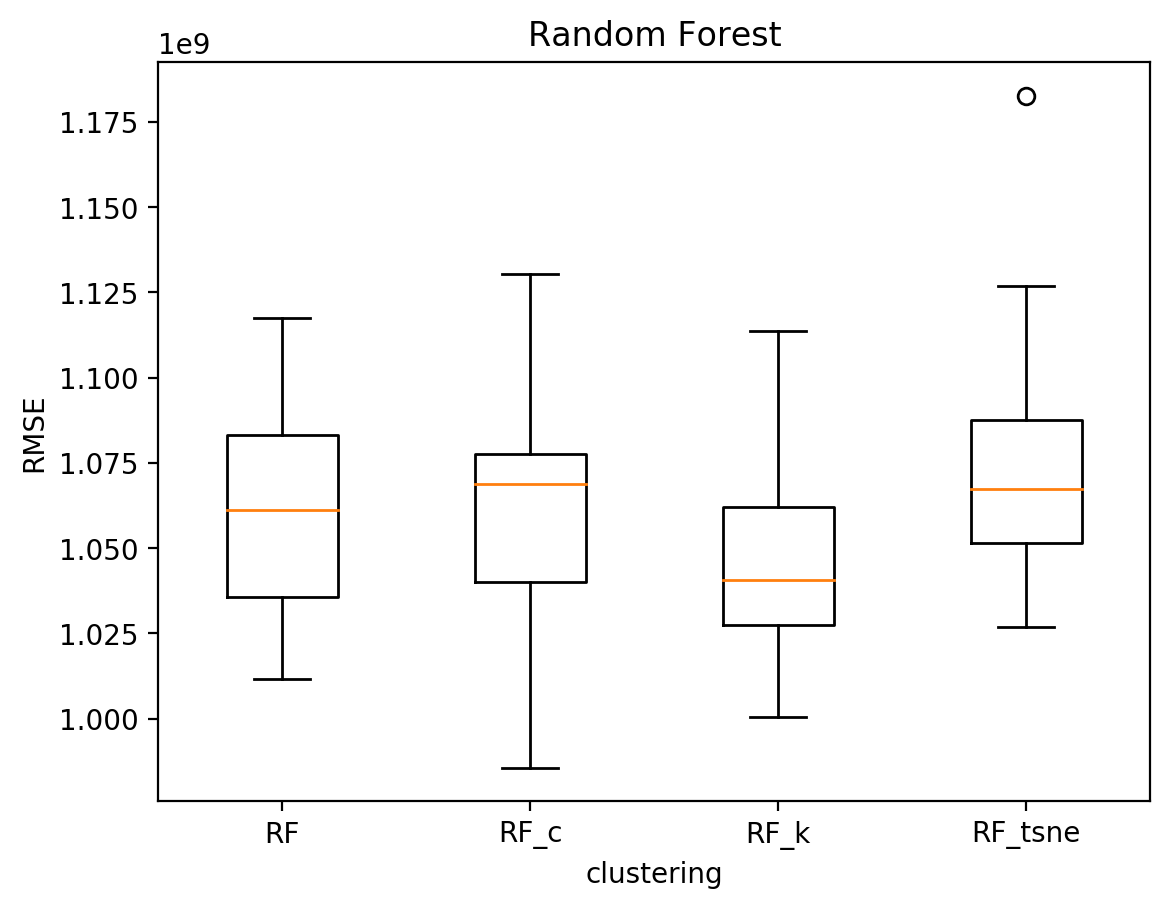

In [75]:
boxplot = plt.figure() 
axes1 = boxplot.add_subplot(1, 1, 1) 

axes1.boxplot(
    [

     RMSE_RF,
     RMSE_RF_c,
     RMSE_RF_k ,
        RMSE_RF_t,
 
     ]
    ,labels=[
     
     'RF',
     'RF_c',
     'RF_k',
        'RF_tsne',
 
 ]
    
    )


axes1.set_xlabel('clustering') 
axes1.set_ylabel('RMSE') 
axes1.set_title('Random Forest')
plt.style.use('default')
plt.show()